In [1]:
import pandas as pd
from binance.client import Client
client=Client()

In [6]:
def getdata(symbol,start):
    frame=pd.DataFrame(client.get_historical_klines(symbol,'1h',start))
    frame=frame.iloc[:,:6]
    frame.columns=['Time','Open','High','Low','Close','Volume']
    frame.set_index('Time',inplace=True)
    frame.index=pd.to_datetime(frame.index,unit='ms')
    frame=frame.astype(float)
    return frame

In [7]:
df=getdata('BTCUSDT','2023-01-01')
df

,Open,High,Low,Close,Volume
Time,,,,,
2023-01-01 00:00:00,16541.77,16545.70,16508.39,16529.67,4364.83570
2023-01-01 01:00:00,16529.59,16556.80,16525.78,16551.47,3590.06669
2023-01-01 02:00:00,16551.47,16559.77,16538.14,16548.19,3318.84038
2023-01-01 03:00:00,16548.19,16548.19,16518.21,16533.04,4242.08050
2023-01-01 04:00:00,16533.04,16535.97,16511.92,16521.85,4285.00909
...,...,...,...,...,...
2024-07-09 03:00:00,57261.90,57272.00,56877.25,57168.36,630.83356
2024-07-09 04:00:00,57168.36,57366.19,57109.21,57286.00,868.57744
2024-07-09 05:00:00,57286.01,57432.93,57120.00,57291.49,849.59689


In [8]:
df['price']=df.Open.shift(-1)
df

,Open,High,Low,Close,Volume,price
Time,,,,,,
2023-01-01 00:00:00,16541.77,16545.70,16508.39,16529.67,4364.83570,16529.59
2023-01-01 01:00:00,16529.59,16556.80,16525.78,16551.47,3590.06669,16551.47
2023-01-01 02:00:00,16551.47,16559.77,16538.14,16548.19,3318.84038,16548.19
2023-01-01 03:00:00,16548.19,16548.19,16518.21,16533.04,4242.08050,16533.04
2023-01-01 04:00:00,16533.04,16535.97,16511.92,16521.85,4285.00909,16522.22
...,...,...,...,...,...,...
2024-07-09 03:00:00,57261.90,57272.00,56877.25,57168.36,630.83356,57168.36
2024-07-09 04:00:00,57168.36,57366.19,57109.21,57286.00,868.57744,57286.01
2024-07-09 05:00:00,57286.01,57432.93,57120.00,57291.49,849.59689,57291.48


In [12]:
df['ret']=df.Close.pct_change()
df=df.dropna()
df

C:\Users\safde\AppData\Local\Temp\ipykernel_3332\2925119026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ret']=df.Close.pct_change()


,Open,High,Low,Close,Volume,price,ret
Time,,,,,,,
2023-01-01 02:00:00,16551.47,16559.77,16538.14,16548.19,3318.84038,16548.19,-0.000198
2023-01-01 03:00:00,16548.19,16548.19,16518.21,16533.04,4242.08050,16533.04,-0.000916
2023-01-01 04:00:00,16533.04,16535.97,16511.92,16521.85,4285.00909,16522.22,-0.000677
2023-01-01 05:00:00,16522.22,16534.98,16512.30,16530.71,3717.37178,16530.71,0.000536
2023-01-01 06:00:00,16530.71,16550.00,16528.81,16539.79,3344.90206,16539.79,0.000549
...,...,...,...,...,...,...,...
2024-07-09 02:00:00,56560.39,57362.66,56335.03,57261.90,1203.10758,57261.90,0.012403
2024-07-09 03:00:00,57261.90,57272.00,56877.25,57168.36,630.83356,57168.36,-0.001634
2024-07-09 04:00:00,57168.36,57366.19,57109.21,57286.00,868.57744,57286.01,0.002058


In [24]:
profits=[]
in_position=False

for index,row in df.iterrows():
    if not in_position and row.ret > 0.01 :
        buyprice=row.price
        in_position=True
        trailing_stop = buyprice * 0.98  
    if in_position:
        if row.Close * 0.98 >= trailing_stop:
            trailing_stop=row.Close * 0.98
        if row.Close <= trailing_stop:
            sellprice=row.price
            profit=(sellprice-buyprice)/buyprice - 0.0015
            profits.append(profit)
            in_position=False

In [15]:
profits

[0.14231388889198518,
 -0.0002587489618034835,
 0.019507308118701164,
 -0.011278853524587582,
 -0.029446522123923888,
 0.005284481995162236,
 0.0193488455454981,
 -0.020958469985723413,
 0.10269064888061032,
 0.008192298128924018,
 -0.020803881915687203,
 -0.02100508280727513,
 -0.014889243548398521,
 -0.009962019900116232,
 -0.020010595734809115,
 -0.018051481553042134,
 0.09265787905630889,
 0.11007651990868185,
 0.05276223504556518,
 -0.008284460330542203,
 -0.010204510141173401,
 -0.018708166729529317,
 0.00021479505733017928,
 0.02019469904010365,
 -0.028283039159219134,
 0.044437962905471896,
 -0.02804773248632432,
 -0.023505588621235057,
 0.06182128338936324,
 -0.0413978426686249,
 -0.004744324130715178,
 0.020183798266872877,
 0.032459777684554804,
 -0.008735601092452363,
 0.005339600599624031,
 -0.03422182052350385,
 -0.00968306062018713,
 -0.010042832538711013,
 0.016235445376549588,
 -0.021823362385829305,
 -0.04331522491828179,
 0.12865272975950762,
 -0.025503129520734445,


<Axes: >

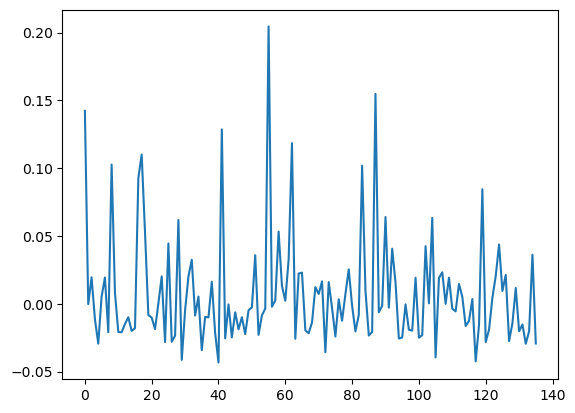

In [16]:
pd.Series(profits).plot()

<Axes: >

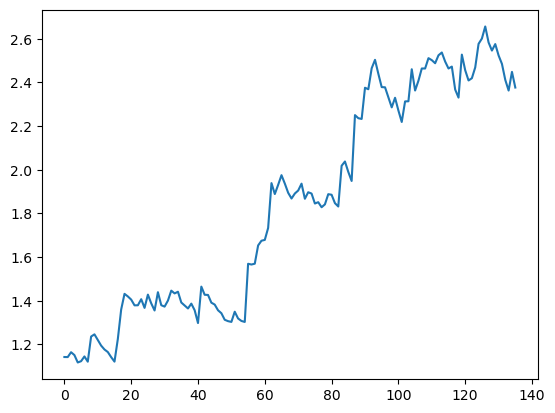

In [21]:
(pd.Series(profits)+1).cumprod().plot()

In [23]:
(pd.Series(profits)+1).prod()

2.3766800533110612

In [27]:
def trail(df,entry,dist): #dist here is stop loss
    profits=[]
    in_position =False
    
    profits=[]
    in_position=False

    for index,row in df.iterrows():
        if not in_position and row.ret > 0.01 :
            buyprice=row.price
            in_position=True
            trailing_stop = buyprice * 0.98  
        if in_position:
            if row.Close * 0.98 >= trailing_stop:
                trailing_stop=row.Close * 0.98
            if row.Close <= trailing_stop:
                sellprice=row.price
                profit=(sellprice-buyprice)/buyprice - 0.0015
                profits.append(profit)
                in_position=False
    return (pd.Series(profits)+1).cumprod()

In [30]:
trail(df,0.005,0.9) # change the return values and play around , here we have 2.3766 return means 137% return

0      1.142314
1      1.142018
2      1.164296
3      1.151164
4      1.117266
         ...   
131    2.485017
132    2.411728
133    2.362896
134    2.448425
135    2.376680
Length: 136, dtype: float64

In [ ]:
#https://www.youtube.com/watch?v=ntGrOburPdQ